# Setup

In [1]:
import sys
import os
from IPython.display import Image
import pandas as pd

# Replace with the actual path to your pyxations package
package_path = "../pyxations"
sys.path.append(package_path)

In [2]:
import pyxations as pyx

# Webgazer

## Dataset to BIDS

The filenames in the dataset folder are assumed to have the following structure: "arx_first_XXXXX.EDF"

Where "arx" is the subject id and "first" is the session name, both separated by an underscore.

In [7]:
current_folder = os.getcwd()
current_folder = os.path.join(os.path.dirname(current_folder),"tests","data")
files_folder_path = os.path.join(current_folder,"antisacadas_files")
bids_dataset_folder = pyx.dataset_to_bids(current_folder,files_folder_path,"antisacadas_dataset", format_name='webgazer')

In [8]:
print(bids_dataset_folder)

/home/gus/Documents/REPOS/pyxations/tests/data/antisacadas_dataset


## Compute derivatives

In [9]:
dataset_type = 'webgazer'
detection_algorithm = 'remodnav'
pyx.compute_derivatives_for_dataset(bids_dataset_folder, dataset_type, detection_algorithm, 
                                    overwrite=True, screen_height=768, screen_width=1024)


Running eye movements detection for None eye...
Dropping saccades with average vel > 1000.0 deg/s, and fixations with amplitude > 1.5 deg
Kept 0 out of 1 fixations
Kept 2 out of 2 saccades
Finding previous and next saccades


0it [00:00, ?it/s]



Kept 0 fixations with previous saccade
Computing average pupil size, and x and y position


0it [00:00, ?it/s]


Skipping preprocessing: not enough parameters.


PosixPath('/home/gus/Documents/REPOS/pyxations/tests/data/antisacadas_dataset_derivatives')

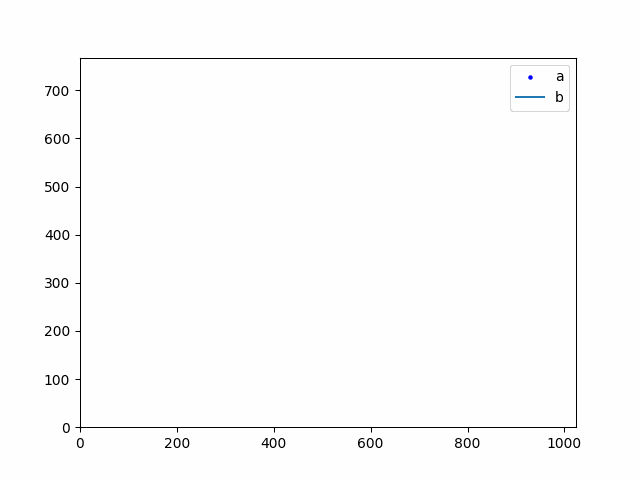

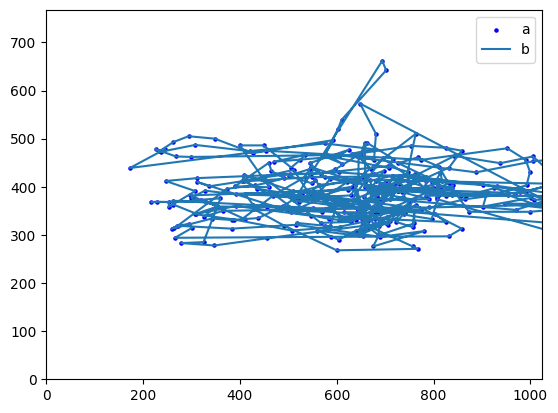

In [10]:
df_path = os.path.join(current_folder, "antisacadas_dataset_derivatives", "sub-0001", "ses-antisacadas", "samples.feather")
df = pd.read_feather(df_path)
out_filename = os.path.join(current_folder, "antisacadas_dataset_derivatives", "sub-0001", "ses-antisacadas", 'animWebgazer.gif')

vis  = pyx.SampleVisualization(df, screen_width=1024, screen_height=768)
vis.animate(display=False, out_file=out_filename)
Image(filename=out_filename) 